In [1]:
from astropy.cosmology import Planck13
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import disperse

In [2]:
coma_ra_int = (130, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.00545, 0.04135)

In [3]:
cosmo = Planck13

In [4]:
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0

In [5]:
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [6]:
coma = pd.read_csv('coma_filtered_RaDecZ.csv')
rosat = pd.read_csv('rosat_filtered_RaDecZ.csv')
sdss_opt_gr = pd.read_csv('sdss_opt_gr_filtered_RaDecZ.csv')
sdss_opt_gr = sdss_opt_gr[sdss_opt_gr['n_gal'] > 6]
sdss_opt_gr.reset_index(drop=True, inplace=True)

In [7]:
# coma

In [8]:
sdss_opt_gr

,n_gal,RA,DEC,Z,r_max,R200
0,180,246.942018,39.401823,0.031119,1.720684,1.794430
1,83,247.581739,39.778534,0.028910,1.040201,1.262930
2,101,246.935701,40.923333,0.031285,1.363890,1.407870
3,85,247.491124,40.610586,0.029515,1.029668,1.102600
4,34,246.010700,41.010818,0.030111,1.035922,1.072530
...,...,...,...,...,...,...
789,7,197.059950,54.376975,0.032255,0.407455,0.725149
790,7,180.664886,33.399111,0.025149,0.662009,0.805321
791,7,212.891488,48.325018,0.007358,0.339113,0.372232
792,8,192.086672,29.284369,0.024528,0.497628,0.649708


In [9]:
sph2cart = 'dist'
in_cart_coords = True

In [10]:
DPS = disperse.Disperse3D(
    coma, sdss_opt_gr, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    sph2cart_f=sph2cart
)

In [11]:
DPS.count_cart_coords()

In [12]:
SIGMA = 3
SMOOTH = 1
BOARD = 'smooth'
ANGLE = 15

In [13]:
DPS.apply_disperse(SIGMA, SMOOTH, BOARD, ANGLE, in_cart_coords)

In [14]:
cl_conn, cl_maxmap, \
fils_conn, maxs_maxmap, \
count_fils, count_maxs = DPS.count_conn_maxmap(
    DPS.clusters['R200'] * 3,
    DPS.clusters['R200'] * 3
)

In [15]:
sum(list(map(lambda x: int(x>0), cl_conn)))

329

In [16]:
a = list(map(lambda x: x>0, cl_conn))

In [17]:
count_fils, count_maxs

(577, 19)

In [18]:
len(DPS.fils)

830

AxesSubplot(0.125,0.125;0.775x0.755)


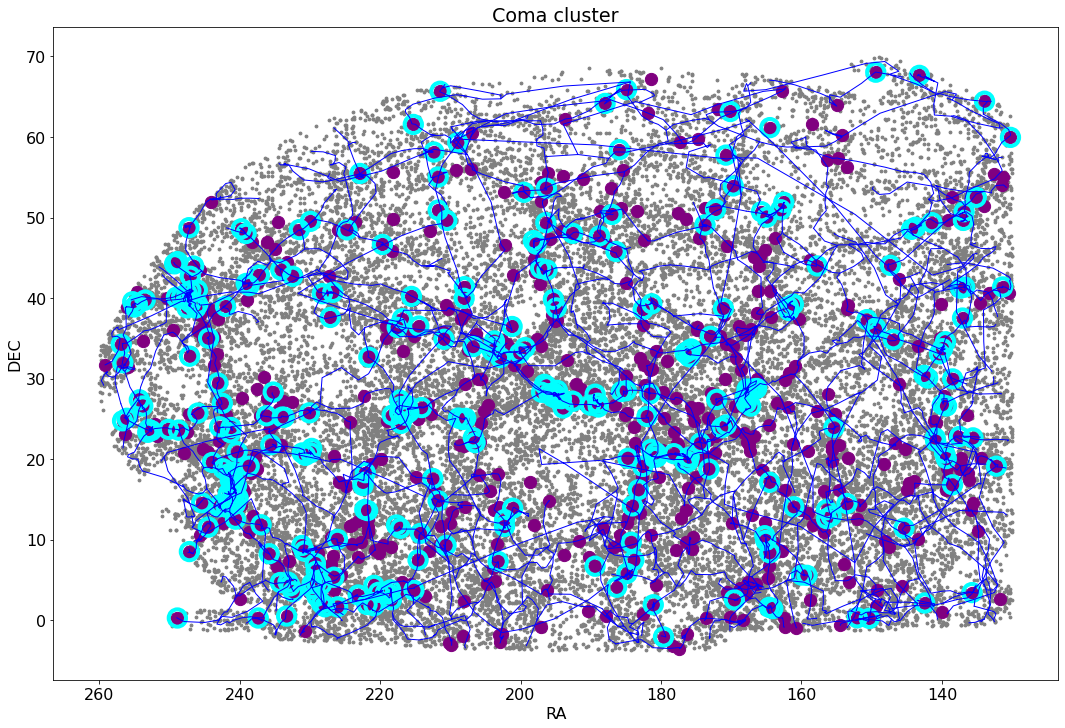

In [19]:
fig, title = DPS.plot_2d(
    plot_cps=False, plot_only_max=False,
#     plot_fils=False, 
    title='Coma cluster',
    cl_fils=list(map(lambda x: x>0, cl_conn)),
#     cl_maxs=list(map(lambda x: x>0, cl_maxmap))
)
plt.savefig(title + '.jpg')

100%|██████████| 830/830 [00:00<00:00, 1943.32it/s]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
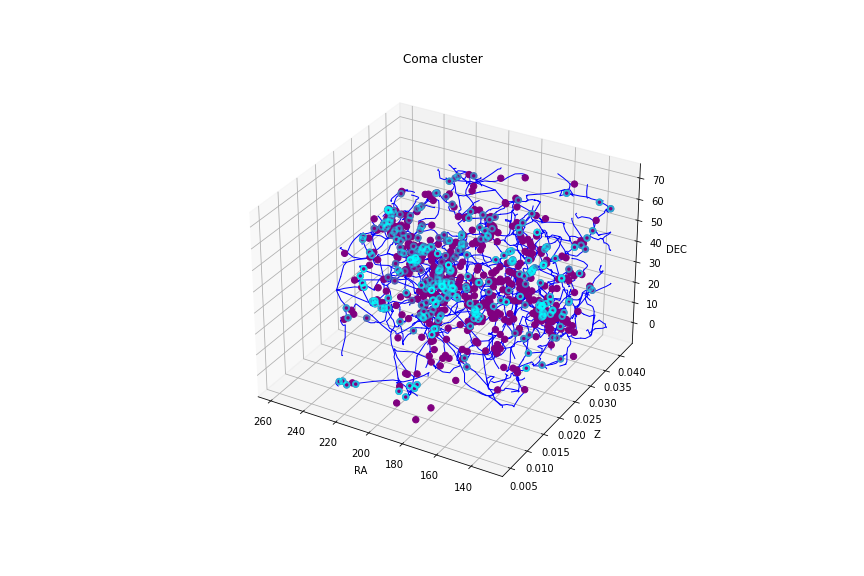

In [22]:
%matplotlib widget
fig = DPS.plot_3d(
    plot_cps=False, plot_only_max=False,
#     plot_fils=False, 
    title='Coma cluster',
    cl_fils=list(map(lambda x: x>0, cl_conn)),
#     cl_maxs=list(map(lambda x: x>0, cl_maxmap))
)

In [21]:
# from astropy.cosmology import Planck13
# import pandas as pd
# import numpy as np
# # %matplotlib widget
# %matplotlib inline
# import matplotlib.pyplot as plt
# import disperse

# cosmo = Planck13

# H0_t = cosmo.H0.value
# Om_t = cosmo.Om0
# Ol_t = 0.69288
# Ok_t = 0.0

# coma_t = pd.read_csv('coma_filtered_RaDecZ.csv')
# clusters_t = pd.read_csv('clusters_filtered_RaDecZ.csv')

# SIGMA_t = 3
# SMOOTH_t = 1
# BOARD_t = 'smooth'

# for sph2cart_t in ['min', 'dist', 'astropy']:
#     for in_cart_coords_t in [True, False]:
#         DPS_t = disperse.Disperse3D(
#             coma_t, clusters_t, '_disperse_03/bin/',
#             H0_t, Om_t, Ol_t, Ok_t,
#             sph2cart_f=sph2cart_t
#         )
#         DPS_t.count_cart_coords()
#         DPS_t.apply_disperse(SIGMA_t, SMOOTH_t, BOARD_t, 0, in_cart_coords_t)
        
#         cl_conn_t, cl_maxmap_t, \
#         fils_conn_t, maxs_maxmap_t, \
#         count_fils_t, count_maxs_t = DPS_t.count_conn_maxmap(
#             DPS_t.clusters['R500'] * 3,
#             DPS_t.clusters['R500'] * 3
#         )
        
#         fig = DPS_t.plot_2d(
#             plot_cps=True, plot_only_max=False,
#             cl_fils=list(map(lambda x: x>0, cl_conn_t)),
#             cl_maxs=list(map(lambda x: x>0, cl_maxmap_t))
#         )
#         plt.savefig(f'{sph2cart_t}{"_SPH" if not in_cart_coords_t else "_CART"}_DPS_t.jpg')